<a href="https://github.com/DoddyRafael/TallerPythonIntroCienciaDatos/blob/icd_ffuv/Dosmasasacopladas.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

#Dos masas acopladas

El hamiltoniano es 

$H=\frac{1}{2m}p^2_{1x}+\frac{1}{2m}p^2_{2x}+\frac{1}{2}k_1x_1^2+\frac{1}{2}k_3x_2^2+\frac{1}{2}k_2(x_2-x_1)^2$ \\
$\dot{q}_i=\frac{\partial H}{\partial p_i}$ \\
$\dot{p}_i=-\frac{\partial H}{\partial q_i}$ \\
$\dot{x}_1=\frac{1}{m}p_{1x}$ \\
$\dot{x}_2=\frac{1}{m}p_{2x}$ \\
$\dot{p}_{1x}=k_2(x_2-x_1)-k_1x_1$ \\
$\dot{p}_{2x}=-k_2(x_2-x_1)-k_3x_2$

$ \vec{q} = \left[ \begin{array}{c} x_1\\x_2 \\p_{1x}\\p_{2x} \end{array} \right]= \left[ \begin{array}{c} q_0 \\q_1\\q_2\\q_3 \end{array} \right]$

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [0]:
'Función que calcula las derivdas de posiciones y momentos'
def campo(q_n, k1, k2, k3, m1, m2): #tiene de argumentos el vector de posiciones y momentos, también las constantes del sistema
  x1, x2, p1, p2 = q_n
  
  x1_dot = p1/m1
  x2_dot = p2/m2
  
  p1_dot = k2*(x2-x1)-k1*x1
  p2_dot = -k2*(x2-x1)-k3*x2

  return np.asarray([x1_dot,x2_dot,p1_dot,p2_dot])

In [0]:
campo([0.,0.,0.,0.],1.,1.,1.,1.,1.)

array([ 0.,  0.,  0., -0.])

In [0]:
'Función que adapta a la función campo a también depender del tiempo'
def campo_t(t_n, q_n, k1, k2, k3, m1, m2): # ahora el tiempo también es un argumento 
  return campo(q_n, k1, k2, k3, m1, m2)

In [0]:
'Función que implimenta el paso de euler una vez'
def paso_euler(f, t_n, q_n, dt, k1, k2, k3, m1, m2): #depende de la función que actua como derivada, de los argumentos de dicha y función, se requiere de un intervalo de tiempo también
  q_dot = f(t_n, q_n, k1, k2, k3, m1, m2)
  q_n_mas_1 = q_n + dt*q_dot
  return q_n_mas_1 

In [0]:
'Función que realiza el paso de euler consecutivamente, integra la trayectoria'
def integrador_simple(f, t, q_0, dt, k1, k2, k3, m1, m2): #mismos argumentos que el paso_euler. t es una arreglo con tinicia y tfinal, q_0 arreglo de condiciones inicales
  t_0, t_f = t 
  n = int((t_f-t_0)/dt)  
  d = len(q_0)
  q_tray= np.zeros((n+1, d))
  t = np.linspace(t_0, t_f, n+1)
  q_tray[0,:] = q_0
  for i in range(n):
    q_tray[i+1,:] = paso_euler(f, t[i], q_tray[i,:], dt, k1, k2, k3, m1, m2)
  return t, q_tray

In [0]:
t, q_tra= integrador_simple(campo_t, [0,100], [0.5, 2.1, 0., 0.], 0.001, 1., 1., 1., 1., 1.)

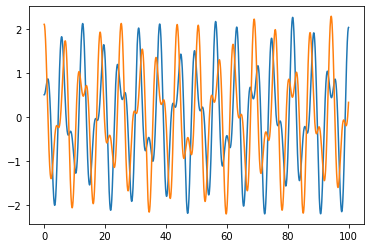

In [0]:
plt.plot(t, q_tra[:,0])
plt.plot(t, q_tra[:,1])

#tiempo de ejecución para distintos valores de parámetros:

In [0]:
inicio=time.clock()
integrador_simple(campo_t, [0,100], [0.5, 0.5, 0., 0.], 0.001, 1., 1., 1., 1., 1.);
print("integrador simple con: m1=1.,m2=1.,k1=k2=k3=1.,x1=0.5,x2=0.5,p1=0,p2=0")
print("tiempo de ejecución:", time.clock()-inicio)

integrador simple con: m1=1.,m2=1.,k1=k2=k3=1.,x1=0.5,x2=0.5,p1=0,p2=0
tiempo de ejecución: 0.7469210000000004


In [0]:
inicio=time.clock()
integrador_simple(campo_t, [0,100], [0.5, 2.1, 0., 0.], 0.001, 1., 1., 1., 1., 1.);
print("integrador simple con: m1=1.,m2=1.,k1=k2=k3=1.,x1=0.5,x2=2.1,p1=0,p2=0")
print("tiempo de ejecución:", time.clock()-inicio)

integrador simple con: m1=1.,m2=1.,k1=k2=k3=1.,x1=0.5,x2=2.1,p1=0,p2=0
tiempo de ejecución: 0.7262909999999998


In [0]:
'ya que a veces el tiempo de ejecución para un conjunto de condiciones varia, se crea esta función que promedia el tiempo de 10 ejecuciones iguales'
def tiempo_prom(det, k1, k2, k3):
   tiempo=np.zeros(10)
   for i in range(10): 
      inicio=time.clock()
      integrador_simple(campo_t, [0,100], [0.5, 2.1, 0., 0.], det, k1, k2, k3, 1., 1.)
      te=time.clock()-inicio
      tiempo[i]=te
   tt=np.sum(tiempo)
   prom=tt/10
   return prom   

In [0]:
tiempo_prom(0.01,1.,1.,1.)

0.07958600000000046

In [0]:
tiempo_prom(0.01,2.,10.,3.)

0.07727270000000033

In [0]:
tiempo_prom(0.001,2.,10.,3.)

0.7486539000000022

Para distintos valores de los parámetros, el tiempo de ejecución es aproximadamente el mismo. Cuando se utilizan constantes de resortes muy diferentes a 1, las graficas se comportan de manera extraña, cosa que se compone al refinar el intervalo de integración, pero es ahi donde ahora sí hay un cambio de el tiempo de integración. Intervalos de centésimas corresponden a tiempos de ejecución de centésimas, intervalos de milésimas corresponden a tiempo de décimas, aumenta.
El código también fue ejecutado en jupyter notebooke(con mi procesador), los tiempo diferían, pero la tendencia es la misma.

In [0]:
t1, q1_tra= integrador_simple(campo_t, [0,100], [0.5, 0.5, 0., 0.], 0.001, 1., 1., 1., 1., 1.)
t2, q2_tra= integrador_simple(campo_t, [0,100], [0.5, 0.5, 0., 0.], 0.001, 2., 50., 3., 1., 1.)

Text(0.5, 1.0, 'diferentes k, necesita refinar interv')

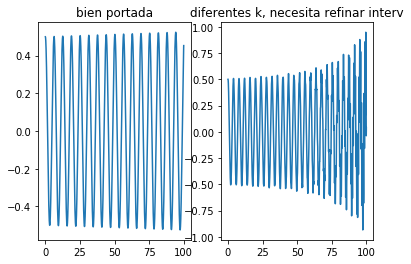

In [0]:
plt.subplot(1,2,1)
plt.plot(t1, q1_tra[:,0])
plt.title("bien portada")
plt.subplot(1,2,2)
plt.plot(t2, q2_tra[:,0])
plt.title("diferentes k, necesita refinar interv")

#Energía del movimiento

Como el hamiltoniano no depende del tiempo, corresponde a la energía \\
Por lo que se puede calcular la energía, evaluando $H$ en cada ciclo del integrador simple. \\
$E=H=\frac{1}{2m}p^2_{1x}+\frac{1}{2m}p^2_{2x}+\frac{1}{2}k_1x_1^2+\frac{1}{2}k_3x_2^2+\frac{1}{2}k_2(x_2-x_1)^2$ 

In [0]:
'Se incluye el calculo de la energía para paso del tiempo'
def integrador_simpleE(f, t, q_0, dt, k1, k2, k3, m1, m2): #mismos argumentos que el paso_euler. t es una arreglo con tinicia y tfinal, q_0 arreglo de condiciones inicales
  t_0, t_f = t 
  n = int((t_f-t_0)/dt)  
  d = len(q_0)
  q_tray= np.zeros((n+1, d))
  E = np.zeros(n+1)
  t = np.linspace(t_0, t_f, n+1)
  q_tray[0,:] = q_0
  E[0] = (0.5/m1)*(q_tray[0,2]**2)+(0.5/m2)*(q_tray[0,3]**2)+0.5*k1*(q_tray[0,0]**2)+0.5*k3*(q_tray[0,1]**2)+0.5*k2*((q_tray[0,1]-q_tray[0,0])**2)
  for i in range(n):
    E[i+1] = (0.5/m1)*(q_tray[i,2]**2)+(0.5/m2)*(q_tray[i,3]**2)+0.5*k1*(q_tray[i,0]**2)+0.5*k3*(q_tray[i,1]**2)+0.5*k2*((q_tray[i,1]-q_tray[i,0])**2)
    q_tray[i+1,:] = paso_euler(f, t[i], q_tray[i,:], dt, k1, k2, k3, m1, m2)
  return t, q_tray, E

In [0]:
t1, qe1_tray, E1 = integrador_simpleE(campo_t, [0,100], [0.5, 0.5, 0., 0.], 0.0001, 1., 1., 1., 1., 1.) 
t2, qe2_tray, E2 = integrador_simpleE(campo_t, [0,100], [0.5, 2.1, 0., 0.], 0.00001, 1., 1., 1., 1., 1.) 

(0, 0.5)

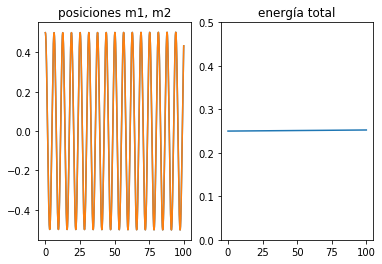

In [0]:
'Energía para las condiciones iniciales x1=0.5,x2=0.5,p1=0,p2=0'
plt.subplot(1,2,1)
plt.plot(t1, qe1_tray[:,0])
plt.plot(t1, qe1_tray[:,1])
plt.title("posiciones m1, m2")
plt.subplot(1,2,2)
plt.plot(t1, E1)
plt.title("energía total")
plt.ylim(0,.5)

(0, 4)

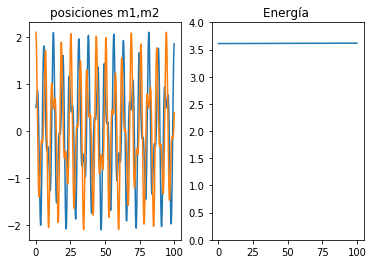

In [0]:
'Energía para las condiciones iniciales x1=0.5,x2=2.1,p1=0.,p2=0.'
plt.subplot(1,2,1)
plt.plot(t2, qe2_tray[:,0])
plt.plot(t2, qe2_tray[:,1])
plt.title("posiciones m1,m2")
plt.subplot(1,2,2)
plt.plot(t2, E2)
plt.title("Energía ")
plt.ylim(0,4)

En realidad,  en el código la energía no se mantiene constante. Tan sólo con mirar las entradas de E se ve que difierenen en milésimas. Al igual que el caso del tiempo de ejecución, esto tiene que ver con el inccremento del tiempo. Si no se refina adecuadamente, la energía puede variar mucho de un paso al otro.

#N masas acopladas

El hamiltoniano para un sistema de $N$ masas iguales unidas por resortes iguales es: \\
$H = \sum_{i=1}^{N}\frac{p_i^2}{2m}+\sum_{i=0}^{N}\frac{k}{2}(x_{i+1}-x_i)^2$ \\
Considerando que existe una masa en la posición $x_0$ que no se mueve, pared izquierda, $x_0=0, p_0=0$, lo mismo para una $N+1$ masa en el otro extremo, pared derecha, $x_{N+1}=0, p_{N+1}=0$, para todo $t$.

Las ecuaciones del movimiento son: \\
$\dot{x}_i = \frac{p_i}{m} $ \\
$\dot{p}_i = k (x_{i+1}-2x_i+x_{i-1}) $

In [0]:
#q y q_n es un vector de 2(N+2) entradas, contando las paredes

In [0]:
'Función que calcula las derivdas de posiciones y momentos'
def Deriv(t_n, q_n, k, m, N): #q_n, vector fila de 2N+4 componentes, contiene posiciones y momentos
  q = q_n
# se agregan a mano los valores que sabemo son estáticos, las paredes.
  q[0] = 0
  q[N+1] = 0
  q[N+2] = 0
  q[2*N+3] = 0

  q_dot=np.zeros(2*N+4)

  for i in range(1,N+1):

    q_dot[i] = q[N+2+i]/m

    q_dot[N+2+i] = k*(q[i+1]-2*q[i]+q[i-1])

  return q_dot

In [0]:
qq=np.random.rand(12) #(2N+4 componentes)

In [0]:
qd= Deriv(0.1, qq, 1., 1., 4)

In [0]:
qd #los valores para las paredes siguen siendo nulos

array([ 0.        ,  0.4610921 ,  0.80365354,  0.99220301,  0.49547291,
        0.        ,  0.        , -1.21671059,  0.18347668,  0.52821832,
       -1.12569193,  0.        ])

In [0]:
'Función que implimenta el paso de euler una vez'
def paso_euler(f, t_n, q_n, dt, k, m, N): #depende de la función que actua como derivada, de los argumentos de dicha y función, se requiere de un intervalo de tiempo también
  q_dot = f(t_n, q_n, k, m, N)
  q_n_mas_1 = q_n + dt*q_dot
  return q_n_mas_1 

In [0]:
'Función que realiza el paso de euler consecutivamente, integra la trayectoria'
def int_simple_N(f, t, q_0, dt, k, m, N): #mismos argumentos que el paso_euler. t es una arreglo con tinicia y tfinal, q_0 arreglo de condiciones inicales
  t_0, t_f = t 
  n = int((t_f-t_0)/dt)  
  d = len(q_0)
  q_tray= np.zeros((n+1, d))
  t = np.linspace(t_0, t_f, n+1)
  q_tray[0,:] = q_0
  for i in range(n):
    q_tray[i+1,:] = paso_euler(f, t[i], q_tray[i,:], dt, k, m, N)
  return t, q_tray

Prueba para 6 masas acopladas, se grafica la posición respecto al tiempo de la partícula 1, con masas=1, k=1 y condiciones iniciales aleatorias . 

In [0]:
N=6
m=1.
k=1.
q0=np.random.rand(2*N+4)

In [0]:
t, q1_tray=int_simple_N(Deriv, [0,100], q0, 0.0001, k, m, N) 

Text(0.5, 1.0, 'Posición de la partícula 1')

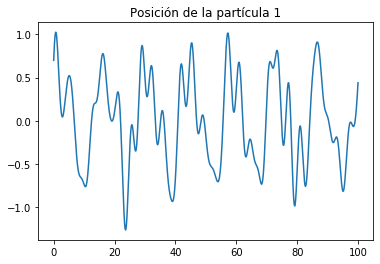

In [0]:
plt.plot(t, q1_tray[:,1])
plt.title("Posición de la partícula 1")

Se debe reproducir el caso para N=2. Para comparar con algo ya hecho, se compara con el caso de las condiciones inicales x1=0.5, x2=0.5, p1=p2=0, ya realizado. Con constante k1=k2=k3=1 y m1=m2=1.

Al introducir el vector de condiciones iniciales, hay que recordar que también cuenta a las paredes, aqui es un vector de 8 componente y no 4.

In [0]:
t, q_tray=int_simple_N(Deriv, [0,100], [0.,0.5,0.5,0.,0.,0.,0.,0.], 0.0001, k, m, 2) 

Text(0.5, 1.0, 'Posición de la partícula 1')

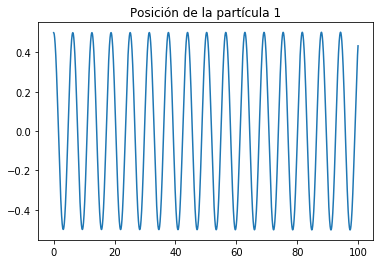

In [0]:
plt.plot(t, q_tray[:,1])
plt.title("Posición de la partícula 1")